In [1]:
# 1.Program to display grayscale image without built in functions
import cv2
import numpy as np

def custom_grayscale(image):
    # Get the dimensions of the image
    height, width, channels = image.shape
    
    # Create an empty grayscale image
    grayscale_image = np.zeros((height, width), dtype=np.uint8)
    
    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the RGB values of the pixel
            r, g, b = image[y, x]
            
            # Calculate the luminance using the formula: Y = 0.299*R + 0.587*G + 0.114*B
            luminance = 0.299 * r + 0.587 * g + 0.114 * b
            
            # Set the pixel value in the grayscale image
            grayscale_image[y, x] = luminance
            
    return grayscale_image

# Load the input image
image = cv2.imread('flower.jpg')

# Convert the image to grayscale using the custom method
gray_image_custom = custom_grayscale(image)

# Display the grayscale image
cv2.imshow('Custom Grayscale', gray_image_custom)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 2.Program to implement image resizing without built in functions
import cv2
import numpy as np

def custom_resize(image, scale_factor):
    """
    Resize the input image without interpolation.

    Parameters:
        image: numpy.ndarray
            Input image.
        scale_factor: float
            Scaling factor for resizing the image.

    Returns:
        numpy.ndarray
            Resized image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the new dimensions after scaling
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create an empty image to store the resized image
    resized_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Sample the original image at regular intervals
    for y in range(new_height):
        for x in range(new_width):
            # Calculate the corresponding pixel coordinates in the original image
            y_original = int(y / scale_factor)
            x_original = int(x / scale_factor)

            # Assign the pixel value from the original image to the resized image
            resized_image[y, x] = image[y_original, x_original]

    return resized_image

# Load the input image
image = cv2.imread('ganesha.jpg')

# Define the scale factor
scale_factor = 3.0  # Increase the size by 3 times

# Resize the image using the custom function
custom_resized_image = custom_resize(image, scale_factor)

# Display the original and custom resized images
cv2.imshow('Original Image', image)
cv2.imshow('Custom Resized Image', custom_resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

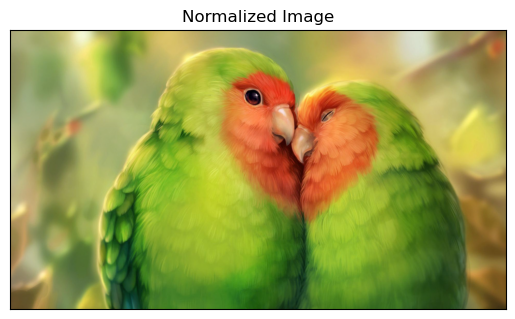

In [6]:
# 3.Program to implement without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('bird.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Calculate the minimum and maximum pixel values for each channel
min_b, max_b = np.min(b), np.max(b)
min_g, max_g = np.min(g), np.max(g)
min_r, max_r = np.min(r), np.max(r)

# Normalize each channel
b_normalized = (b - min_b) / (max_b - min_b)
g_normalized = (g - min_g) / (max_g - min_g)
r_normalized = (r - min_r) / (max_r - min_r)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))

# Display the normalized image
plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()

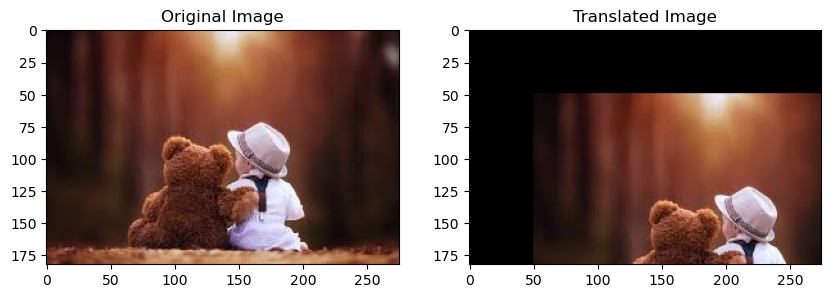

In [7]:
# 4.Program to implement image translation without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def translate_image(image, dx, dy):
    """
    Translate the input image by dx pixels in the x-direction and dy pixels in the y-direction.

    Parameters:
        image: numpy.ndarray
            Input image.
        dx: int
            Number of pixels to translate the image in the x-direction.
        dy: int
            Number of pixels to translate the image in the y-direction.

    Returns:
        numpy.ndarray
            Translated image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Create an empty image to store the translated image
    translated_image = np.zeros_like(image)

    # Iterate over each pixel in the translated image
    for y in range(height):
        for x in range(width):
            # Calculate the corresponding pixel coordinates in the original image
            x_original = x - dx
            y_original = y - dy

            # Check if the original pixel coordinates are within the bounds of the original image
            if 0 <= x_original < width and 0 <= y_original < height:
                # Assign the pixel value from the original image to the translated image
                translated_image[y, x] = image[y_original, x_original]

    return translated_image

# Load the input image
image = cv2.imread('teddy.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the translation parameters
dx = 50  # Translation in the x-direction
dy = 50  # Translation in the y-direction

# Translate the image using the custom function
translated_image = translate_image(image_rgb, dx, dy)

# Display the original and translated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title('Translated Image')

plt.show()

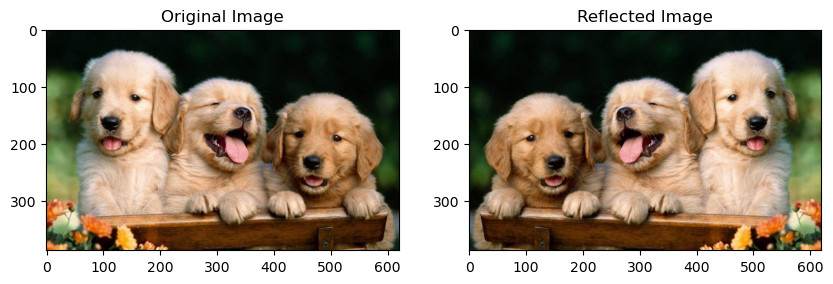

In [8]:
# 5.Program to implement reflected image without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reflect_image(image, axis):
    """
    Reflect the input image along the specified axis.

    Parameters:
        image: numpy.ndarray
            Input image.
        axis: int
            Axis along which to reflect the image (0 for vertical reflection, 1 for horizontal reflection).

    Returns:
        numpy.ndarray
            Reflected image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Create an empty image to store the reflected image
    reflected_image = np.zeros_like(image)

    # Perform reflection along the specified axis
    if axis == 0:  # Vertical reflection
        for y in range(height):
            for x in range(width):
                reflected_image[height - y - 1, x] = image[y, x]
    elif axis == 1:  # Horizontal reflection
        for y in range(height):
            for x in range(width):
                reflected_image[y, width - x - 1] = image[y, x]

    return reflected_image

# Load the input image
image = cv2.imread('dogs.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the axis of reflection (0 for vertical reflection, 1 for horizontal reflection)
axis = 1  # Horizontal reflection

# Reflect the image using the custom function
reflected_image = reflect_image(image_rgb, axis)

# Display the original and reflected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reflected_image)
plt.title('Reflected Image')

plt.show()

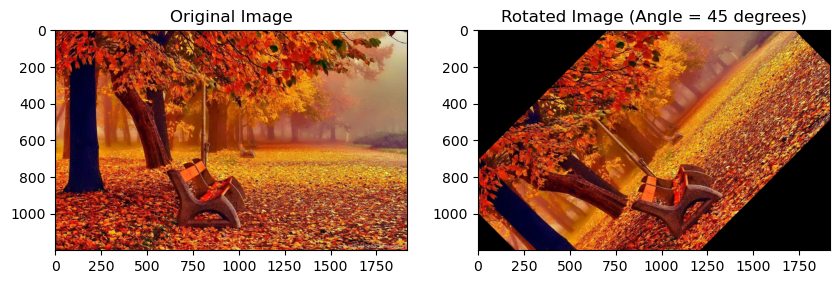

In [1]:
# 6.Program to implement image rotation without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def rotate_image(image, angle):
    """
    Rotate the input image by the specified angle (in degrees) around its center.

    Parameters:
        image: numpy.ndarray
            Input image.
        angle: float
            Angle of rotation in degrees (positive values for counter-clockwise rotation).

    Returns:
        numpy.ndarray
            Rotated image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Convert the angle from degrees to radians
    theta = math.radians(angle)

    # Calculate the rotation matrix
    rotation_matrix = np.array([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ])

    # Calculate the coordinates of the center of the image
    center_x = width / 2
    center_y = height / 2

    # Create an empty image to store the rotated image
    rotated_image = np.zeros_like(image)

    # Perform rotation by iterating over each pixel in the rotated image
    for y in range(height):
        for x in range(width):
            # Calculate the coordinates of the pixel relative to the center of the image
            x_rel = x - center_x
            y_rel = y - center_y

            # Apply the rotation transformation
            x_rotated, y_rotated = np.dot(rotation_matrix, [x_rel, y_rel])

            # Translate the rotated coordinates back to the original image coordinates
            x_rotated += center_x
            y_rotated += center_y

            # Round the rotated coordinates to the nearest integer
            x_rotated = int(round(x_rotated))
            y_rotated = int(round(y_rotated))

            # Check if the rotated coordinates are within the bounds of the original image
            if 0 <= x_rotated < width and 0 <= y_rotated < height:
                # Assign the pixel value from the original image to the rotated image
                rotated_image[y, x] = image[y_rotated, x_rotated]

    return rotated_image

# Load the input image
image = cv2.imread('naturre.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the angle of rotation in degrees (positive values for counter-clockwise rotation)
angle = 45

# Rotate the image using the custom function
rotated_image = rotate_image(image_rgb, angle)

# Display the original and rotated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title('Rotated Image (Angle = {} degrees)'.format(angle))

plt.show()

In [ ]:
# 7.Program to implement image scaling without built in functions
import cv2
import numpy as np

def scale_image(image, scale_factor):
    """
    Scale the input image by the specified scale factor using bilinear interpolation.

    Parameters:
        image: numpy.ndarray
            Input image.
        scale_factor: float
            Scaling factor for resizing the image.

    Returns:
        numpy.ndarray
            Scaled image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the new dimensions after scaling
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create an empty image to store the scaled image
    scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Iterate over each pixel in the scaled image
    for y in range(new_height):
        for x in range(new_width):
            # Calculate the corresponding pixel coordinates in the original image
            x_original = x / scale_factor
            y_original = y / scale_factor

            # Find the integer and fractional parts of the coordinates
            x_int = int(x_original)
            y_int = int(y_original)
            x_frac = x_original - x_int
            y_frac = y_original - y_int

            # Ensure that the coordinates are within the bounds of the original image
            if 0 <= x_int < width - 1 and 0 <= y_int < height - 1:
                # Perform bilinear interpolation
                top_left = image[y_int, x_int] * (1 - x_frac) * (1 - y_frac)
                top_right = image[y_int, x_int + 1] * x_frac * (1 - y_frac)
                bottom_left = image[y_int + 1, x_int] * (1 - x_frac) * y_frac
                bottom_right = image[y_int + 1, x_int + 1] * x_frac * y_frac

                # Assign the interpolated pixel value to the scaled image
                scaled_image[y, x] = top_left + top_right + bottom_left + bottom_right

    return scaled_image

# Load the input image
image = cv2.imread('cat.jpg')

# Define the scale factor
scale_factor = 1.5  # Increase the size by 1.5 times

# Scale the image using the custom function
scaled_image = scale_image(image, scale_factor)

# Display the original and scaled images using cv2.imshow()
cv2.imshow('Original Image', image)
cv2.imshow('Scaled Image', scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

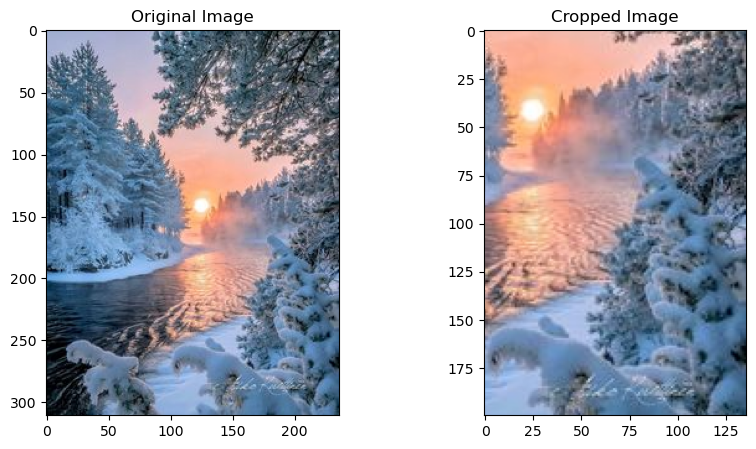

In [1]:
# 8.Program to implement image cropping without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image, x, y, w, h):
    """
    Crop the input image to the specified region of interest (ROI).

    Parameters:
        image: numpy.ndarray
            Input image.
        x: int
            X-coordinate of the top-left corner of the ROI.
        y: int
            Y-coordinate of the top-left corner of the ROI.
        w: int
            Width of the ROI.
        h: int
            Height of the ROI.

    Returns:
        numpy.ndarray
            Cropped image.
    """
    # Extract the region of interest (ROI) from the input image
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

# Load the input image
image = cv2.imread('winter.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the region of interest (ROI) for cropping
x = 100   # X-coordinate of the top-left corner of the ROI
y = 100   # Y-coordinate of the top-left corner of the ROI
w = 200   # Width of the ROI
h = 200   # Height of the ROI

# Crop the image using the custom function
cropped_image = crop_image(image_rgb, x, y, w, h)

# Display the original and cropped images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped Image')

plt.show()

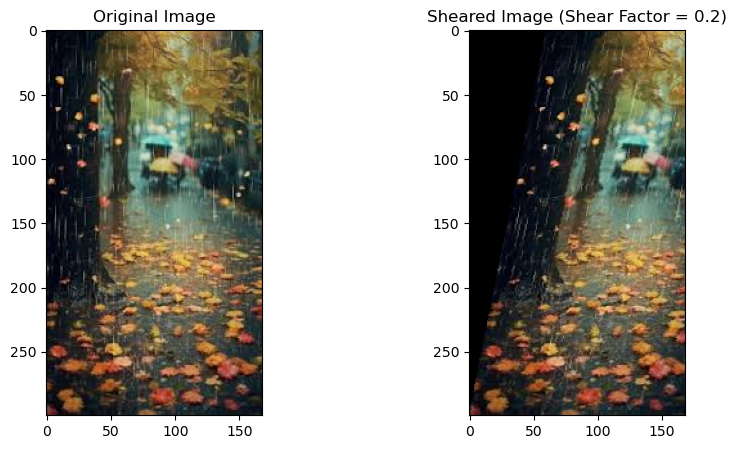

In [2]:
# 9.Program to implement sheared image without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_x_axis(image, shear_factor):
    """
    Shear the input image in the X-axis by the specified shear factor.

    Parameters:
        image: numpy.ndarray
            Input image.
        shear_factor: float
            Shear factor for shearing the image in the X-axis.

    Returns:
        numpy.ndarray
            Sheared image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the number of pixels to shift each row by
    shift_pixels = int(height * shear_factor)

    # Create an empty image to store the sheared image
    sheared_image = np.zeros_like(image)

    # Iterate over each pixel in the sheared image
    for y in range(height):
        for x in range(width):
            # Calculate the new x-coordinate based on the shear factor
            new_x = x + shift_pixels * (height - y) // height

            # Check if the new x-coordinate is within the bounds of the original image
            if 0 <= new_x < width:
                # Assign the pixel value from the original image to the sheared image
                sheared_image[y, new_x] = image[y, x]

    return sheared_image

# Load the input image
image = cv2.imread('rain.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the shear factor (positive values for rightward shear, negative values for leftward shear)
shear_factor = 0.2

# Shear the image using the custom function
sheared_image = shear_x_axis(image_rgb, shear_factor)

# Display the original and sheared images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared Image (Shear Factor = {})'.format(shear_factor))

plt.show()

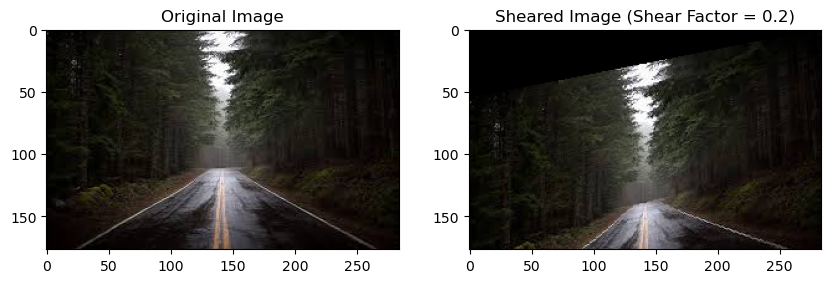

In [3]:
# 10.Program to display sheared image without built in functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_y_axis(image, shear_factor):
    """
    Shear the input image in the Y-axis by the specified shear factor.

    Parameters:
        image: numpy.ndarray
            Input image.
        shear_factor: float
            Shear factor for shearing the image in the Y-axis.

    Returns:
        numpy.ndarray
            Sheared image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the number of pixels to shift each column by
    shift_pixels = int(width * shear_factor)

    # Create an empty image to store the sheared image
    sheared_image = np.zeros_like(image)

    # Iterate over each pixel in the sheared image
    for y in range(height):
        for x in range(width):
            # Calculate the new y-coordinate based on the shear factor
            new_y = y + shift_pixels * (width - x) // width

            # Check if the new y-coordinate is within the bounds of the original image
            if 0 <= new_y < height:
                # Assign the pixel value from the original image to the sheared image
                sheared_image[new_y, x] = image[y, x]

    return sheared_image

# Load the input image
image = cv2.imread('road.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the shear factor (positive values for downward shear, negative values for upward shear)
shear_factor = 0.2

# Shear the image using the custom function
sheared_image = shear_y_axis(image_rgb, shear_factor)

# Display the original and sheared images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared Image (Shear Factor = {})'.format(shear_factor))

plt.show()

In [ ]:
# 11.Program to display sharpened image without using built in functions
import numpy as np
import cv2

def sharpen_image(image, kernel_size=(3, 3), strength=1.0):
    # Define sharpening kernel
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
    
    # Normalize kernel
    sharpen_kernel = sharpen_kernel / np.sum(sharpen_kernel)
    
    # Apply convolution with the sharpening kernel
    sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
    
    # Adjust strength
    sharpened_image = cv2.addWeighted(image, 1 + strength, sharpened_image, -strength, 0)
    
    return sharpened_image

# Load the image
image_path = 'sea.jpg'
image = cv2.imread(image_path)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply sharpening
sharpened_image = sharpen_image(gray_image)

# Display the original and sharpened images
cv2.imshow('Original Image', gray_image)
cv2.imshow('Sharpened Image', sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

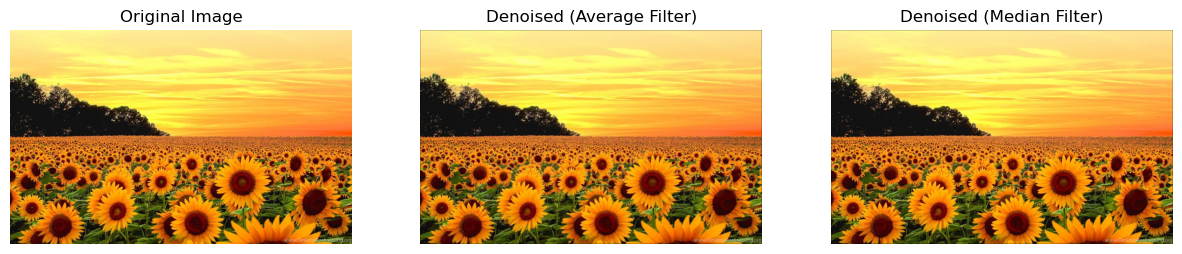

In [2]:
# 12.Program to display filtered images without using built in functions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def average_filter(image, kernel_size):
    height, width, channels = image.shape
    output = np.zeros((height, width, channels), dtype=np.uint8)
    k_half = kernel_size // 2
    
    for i in range(k_half, height - k_half):
        for j in range(k_half, width - k_half):
            for c in range(channels):
                sum = 0
                for m in range(-k_half, k_half + 1):
                    for n in range(-k_half, k_half + 1):
                        sum += image[i+m, j+n, c]
                output[i, j, c] = sum // (kernel_size ** 2)
    
    return output

def median_filter(image, kernel_size):
    height, width, channels = image.shape
    output = np.zeros((height, width, channels), dtype=np.uint8)
    k_half = kernel_size // 2
    
    for i in range(k_half, height - k_half):
        for j in range(k_half, width - k_half):
            for c in range(channels):
                neighbors = []
                for m in range(-k_half, k_half + 1):
                    for n in range(-k_half, k_half + 1):
                        neighbors.append(image[i+m, j+n, c])
                output[i, j, c] = np.median(neighbors)
    
    return output

# Load the image
image_path = 'sunflower.jpg'
image = np.array(Image.open(image_path))

# Remove noise using average filter
denoised_avg = average_filter(image, kernel_size=3)

# Remove noise using median filter
denoised_median = median_filter(image, kernel_size=3)

# Display the original and denoised images
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(denoised_avg)
plt.title('Denoised (Average Filter)')
plt.axis('off')

plt.subplot(133)
plt.imshow(denoised_median)
plt.title('Denoised (Median Filter)')
plt.axis('off')

plt.show()

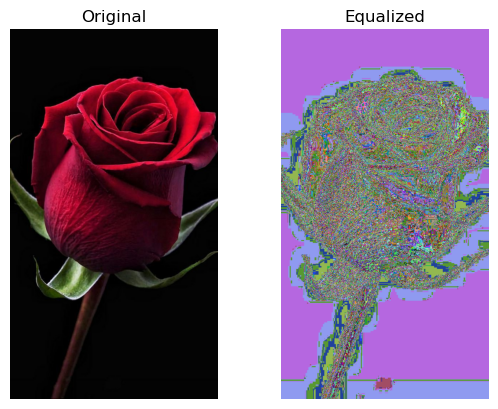

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def histogram_equalization_color(image):
    equalized_image = np.zeros_like(image)
    for i in range(3):  # Loop over RGB channels
        channel = image[:,:,i]
        # Compute histogram
        histogram, _ = np.histogram(channel.flatten(), bins=256, range=(0, 255))
        # Compute cumulative distribution function
        cdf = histogram.cumsum()
        cdf_normalized = cdf * histogram.max() / cdf.max()
        # Perform histogram equalization
        equalized_channel = np.interp(channel.flatten(), range(256), cdf_normalized).reshape(channel.shape)
        equalized_image[:,:,i] = equalized_channel
    return equalized_image.astype(np.uint8)

# Load the image
image = cv2.imread('roses.jpg')

# Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Perform histogram equalization on color image
equalized_image = histogram_equalization_color(image)

# Plot the equalized image
plt.subplot(1, 2, 2)
plt.title("Equalized")
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=1):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

def convolve2d(image, kernel):
    kernel_size = kernel.shape[0]
    pad_width = kernel_size // 2
    padded_image = np.pad(image, pad_width, mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)
    return output

def sobel_filters(image):
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gradient_x = convolve2d(image, kernel_x)
    gradient_y = convolve2d(image, kernel_y)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x)
    return magnitude, angle

def non_maximum_suppression(magnitude, angle):
    suppressed = np.zeros_like(magnitude)
    angle = np.rad2deg(angle) % 180
    for i in range(1, magnitude.shape[0]-1):
        for j in range(1, magnitude.shape[1]-1):
            direction = angle[i, j]
            if (0 <= direction < 22.5) or (157.5 <= direction <= 180) or (22.5 <= direction < 67.5):
                neighbor1 = magnitude[i, j+1]
                neighbor2 = magnitude[i, j-1]
            elif (67.5 <= direction < 112.5) or (112.5 <= direction < 157.5):
                neighbor1 = magnitude[i+1, j-1]
                neighbor2 = magnitude[i-1, j+1]
            elif (112.5 <= direction < 157.5) or (157.5 <= direction <= 180) or (22.5 <= direction < 67.5):
                neighbor1 = magnitude[i+1, j]
                neighbor2 = magnitude[i-1, j]
            elif (67.5 <= direction < 112.5):
                neighbor1 = magnitude[i-1, j]
                neighbor2 = magnitude[i+1, j]
            if (magnitude[i, j] >= neighbor1) and (magnitude[i, j] >= neighbor2):
                suppressed[i, j] = magnitude[i, j]
    return suppressed

def double_thresholding(suppressed, low_threshold_ratio=0.05, high_threshold_ratio=0.09):
    high_threshold = suppressed.max() * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio
    weak = 25
    strong = 255
    strong_indices = suppressed >= high_threshold
    suppressed_indices = np.where((suppressed >= low_threshold) & (suppressed < high_threshold))
    suppressed[suppressed_indices] = weak
    suppressed[strong_indices] = strong
    return suppressed

def edge_tracking(image):
    weak = 25
    strong = 255
    rows, cols = image.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if image[i, j] == weak:
                if ((image[i+1, j-1] == strong) or (image[i+1, j] == strong) or (image[i+1, j+1] == strong)
                    or (image[i, j-1] == strong) or (image[i, j+1] == strong)
                    or (image[i-1, j-1] == strong) or (image[i-1, j] == strong) or (image[i-1, j+1] == strong)):
                    image[i, j] = strong
                else:
                    image[i, j] = 0
    return image

# Read image from disk.
img = plt.imread('rose.jpg').astype(float)

# Convert BGR image to grayscale
image_gray = np.mean(img, axis=2)

# Apply Gaussian blur
kernel_size = 5
sigma = 1.4
gaussian_kernel_array = gaussian_kernel(kernel_size, sigma)
blurred_image = convolve2d(image_gray, gaussian_kernel_array)

# Apply Sobel filters
magnitude, angle = sobel_filters(blurred_image)

# Perform non-maximum suppression
suppressed_image = non_maximum_suppression(magnitude, angle)

# Perform double thresholding
edge_image = double_thresholding(suppressed_image)

# Perform edge tracking by hysteresis
edge_image = edge_tracking(edge_image)

# Plot the result
plt.imshow(edge_image, cmap='gray')
plt.title('Canny Edge Detection (Without Built-in Functions)')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=1):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

def convolution(image, kernel):
    m, n, _ = image.shape
    y, x = kernel.shape
    y = y // 2
    x = x // 2
    new_image = np.zeros_like(image)
    for i in range(y, m - y):
        for j in range(x, n - x):
            for k in range(image.shape[2]):  # Iterate over channels
                new_image[i, j, k] = np.sum(image[i-y:i+y+1, j-x:j+x+1, k] * kernel)
    return new_image

def blur_image(image, kernel_size):
    kernel = gaussian_kernel(kernel_size)
    blurred_image = convolution(image, kernel)
    return blurred_image

# Load the image
image = plt.imread('sunflower.jpg')

# Apply Gaussian blur
blurred_image = blur_image(image, kernel_size=5)

# Plot the original and blurred images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image.astype(np.uint8))
plt.title('Blurred Image')
plt.axis('off')

plt.show()